<h1> Exploratory Data Analysis <h1/>

<h3> DB Connection SQL Server <h3/>

In [35]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import folium
from folium.plugins import HeatMap

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

#DB-Connection
driver = '{ODBC Driver 17 for SQL Server}' # This might be a different version on your system
server = 'ANNINAYOGA\SQLEXPRESS'
database = 'Immo'
username = 'immoadmin'
password = 'zhaw$1234'
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

#Connection and SQL-Query for table property
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM property"
df_property = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

#Connection and SQL-Query for table location
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM location"
df_location = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

# Querying the cleaned property table
# Pfad zur CSV-Datei angeben
file_path = r'C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience\filtered_property_location_clean.csv'

try:
    # Versuche, die CSV-Datei einzulesen mit dem spezifizierten Trennzeichen und Fehlerbehandlung
    df_filtered_property_location_clean = pd.read_csv(file_path, sep=';', quotechar='"', on_bad_lines='skip')
except Exception as e:
    print("Ein Fehler ist aufgetreten:", e)

c:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience


In [36]:
    num_entries = len(df_filtered_property_location_clean)
    print("Anzahl der Einträge:", num_entries)

Anzahl der Einträge: 8861


<h3>DB Connection MYSQL<h3/>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from sqlalchemy import create_engine

# Database connection details
db_config = {
    'host': '127.0.0.1',
    'port': '13306',
    'user': 'admin',
    'password': 'admin123',
    'database': 'immo'
}

# Create the engine
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

# Querying the property table
query_property = "SELECT * FROM Property"
df_property = pd.read_sql(query_property, engine)

# Querying the location table
query_location = "SELECT * FROM Location"
df_location = pd.read_sql(query_location, engine)

InterfaceError: (mysql.connector.errors.InterfaceError) 2003: Can't connect to MySQL server on '127.0.0.1:13306' (10061 Es konnte keine Verbindung hergestellt werden, da der Zielcomputer die Verbindung verweigerte)
(Background on this error at: https://sqlalche.me/e/20/rvf5)

<h2>EDA<h2/>

In [ ]:
df_filtered_property_location_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ListingId                     8861 non-null   int64  
 1   Timestamp                     8861 non-null   object 
 2   Rooms                         8861 non-null   float64
 3   SquareMeter                   8861 non-null   float64
 4   Floor                         7849 non-null   object 
 5   Availability                  8861 non-null   object 
 6   ObjectType                    8861 non-null   object 
 7   YearBuilt                     4533 non-null   object 
 8   Price                         8861 non-null   float64
 9   AdditionalCost                7468 non-null   float64
 10  NetPrice                      8002 non-null   float64
 11  LocationId                    8861 non-null   object 
 12  PropertyAdditionalFeaturesId  8861 non-null   object 
 13  Pro

<h3>Summary statistics of numeric variables<h3/>

In [ ]:
df_filtered_property_location_clean.describe()

,ListingId,Rooms,SquareMeter,Price,AdditionalCost,NetPrice,zip,longitude,latitude,bfs_number,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
count,8.861000e+03,8861.000000,8861.000000,8861.000000,7468.000000,8002.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8815.000000,8861.000000,8861.000000,8861.000000,8861.000000
mean,3.946682e+09,3.587744,91.452545,2106.367791,240.814140,1859.722819,5361.280555,8.060317,47.072241,3353.256630,135.711308,113.371439,135.869755,113.399765,1760.973908,5.675996,1.686943,10.355829,24.229627
std,2.315699e+08,1.277388,44.192031,1315.463699,101.994908,1214.949754,2628.808745,0.896948,0.494674,2051.174519,71.543952,56.185629,71.460200,56.150140,2362.391540,4.170584,2.225483,20.926047,10.202898
min,1.081471e+08,1.000000,9.000000,140.000000,1.000000,80.000000,1000.000000,5.974333,45.832144,1.000000,50.000000,25.000000,50.000000,25.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000731e+09,2.500000,66.000000,1460.000000,180.000000,1257.250000,3063.000000,7.414402,46.815956,1632.000000,99.000000,75.000000,99.000000,75.000000,401.000000,3.000000,0.000000,1.000000,18.410714
50%,4.000863e+09,3.500000,85.000000,1811.000000,230.000000,1585.000000,5070.000000,8.038884,47.253677,3203.000000,105.000000,107.000000,105.000000,107.000000,875.000000,5.000000,1.000000,3.000000,21.866667
75%,4.000933e+09,4.500000,107.000000,2340.000000,290.000000,2050.000000,8050.000000,8.858889,47.440670,5192.000000,147.500000,141.000000,147.500000,141.000000,1932.000000,8.000000,2.000000,9.000000,27.000000
max,4.000977e+09,15.000000,680.000000,25000.000000,2550.000000,20000.000000,9657.000000,10.336857,47.785978,6812.000000,335.000000,525.000000,335.000000,525.000000,12811.000000,27.000000,18.000000,202.000000,228.000000


<h3>Skewness/Kurtosis<h3/>

In [ ]:
#Skewness of attributes Price, Rooms, SquareMeter, Price_per_m2
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].skew()

Price           5.068347
Rooms           0.857000
SquareMeter     2.807079
Price_per_m2    3.545109
dtype: float64

In [ ]:
#Kurtosis of attributes Price, Rooms, SquareMeter, Price_per_m2
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].kurtosis()

Price           45.903501
Rooms            4.259788
SquareMeter     19.051220
Price_per_m2    30.524677
dtype: float64

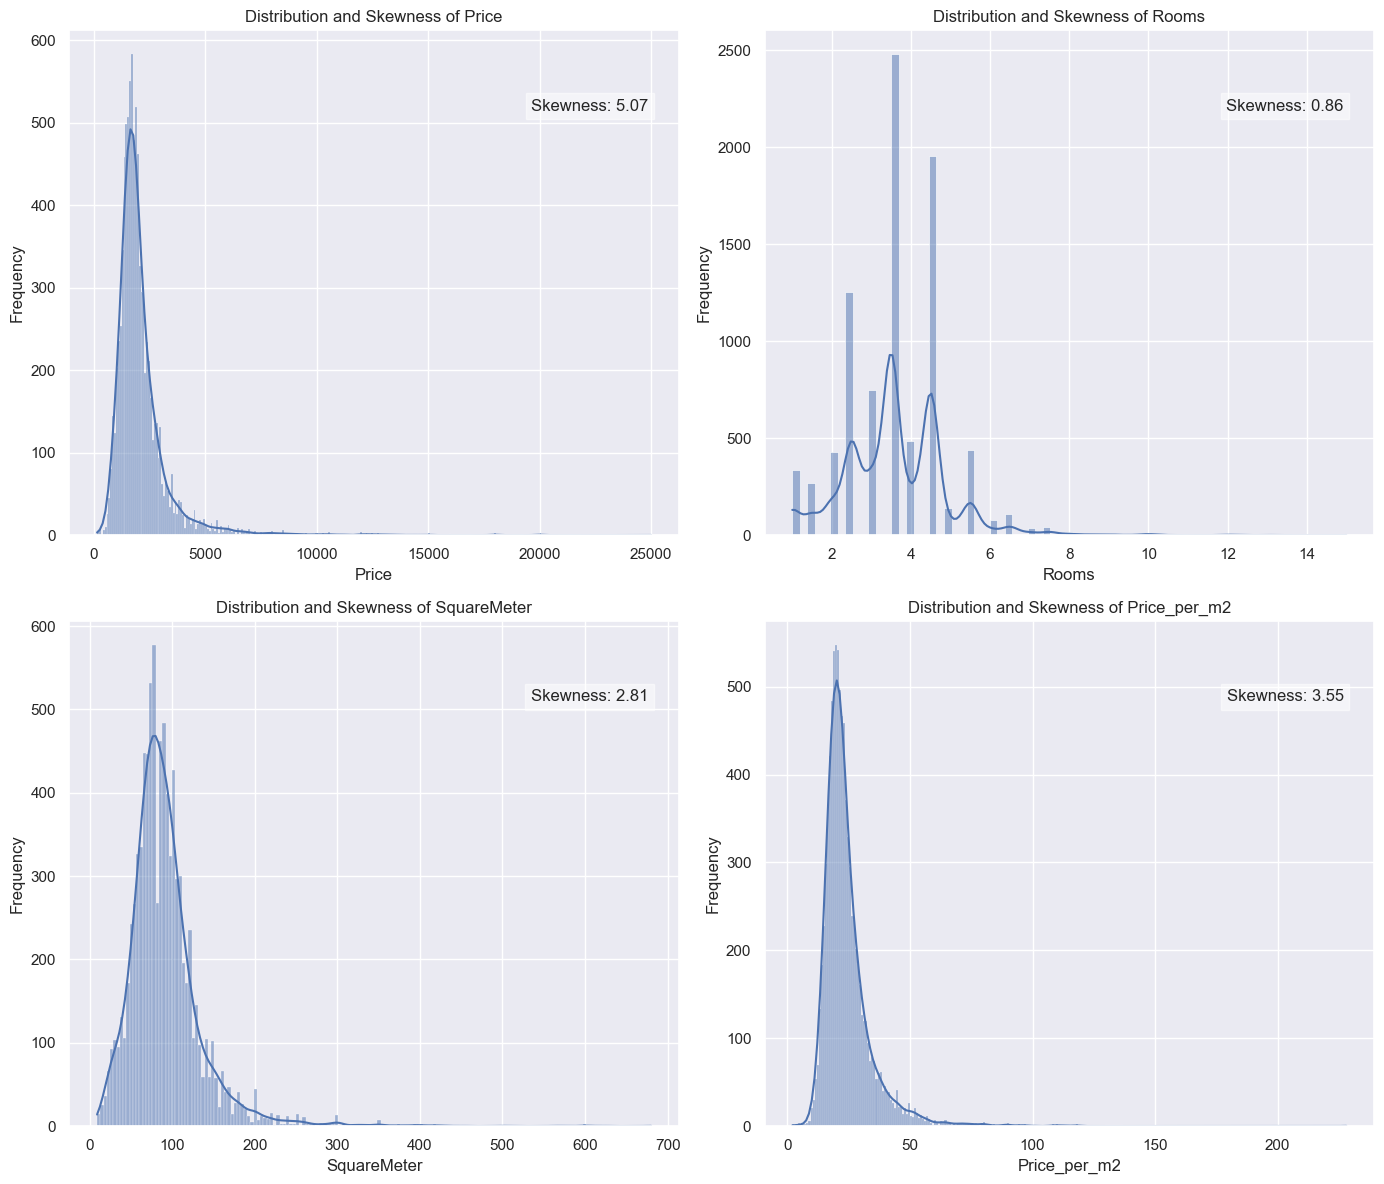

In [ ]:
# Distribution and Skewness of Price, Rooms, SquareMeter, Price_per_m2
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 Grid für 4 Plots
columns = ['Price', 'Rooms', 'SquareMeter', 'Price_per_m2']
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.histplot(df_filtered_property_location_clean[col], kde=True, ax=ax)
    ax.set_title(f'Distribution and Skewness of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    skew_val = df_filtered_property_location_clean[col].skew()
    ax.text(0.95, 0.85, f'Skewness: {skew_val:.2f}', transform=ax.transAxes, 
            horizontalalignment='right', verticalalignment='center', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

<h3>Distribution<h3/>

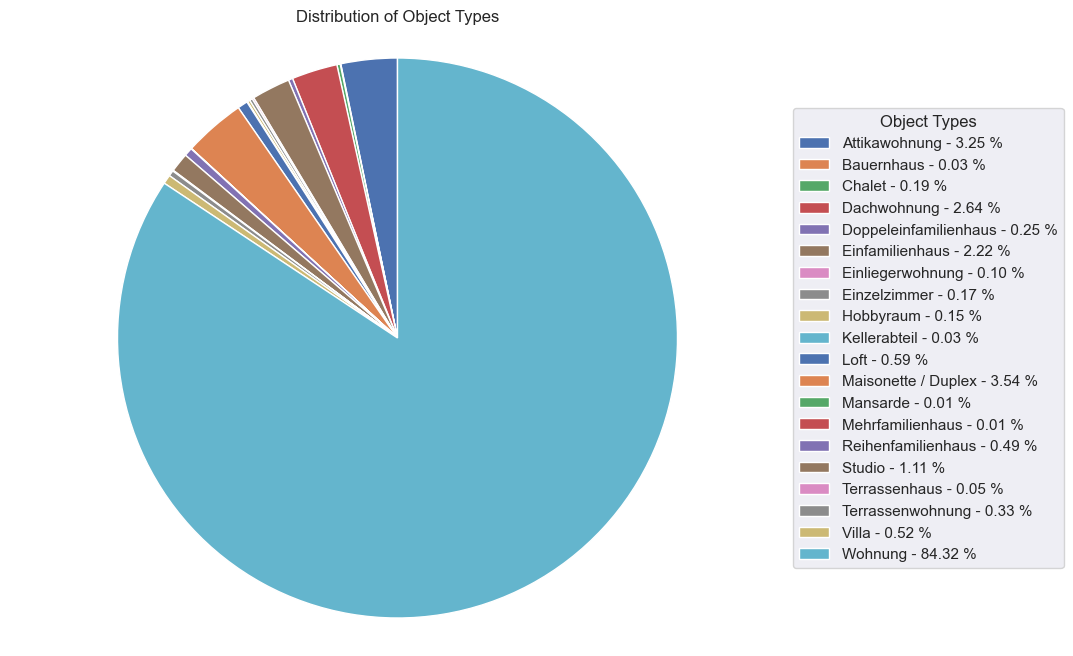

In [ ]:
#Object Types
object_type_counts = df_filtered_property_location_clean.groupby('ObjectType').size()

# Calculate percentages
percentages = 100 * object_type_counts / object_type_counts.sum()

# Create labels for the legend with percentages
legend_labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(object_type_counts.index, percentages)]

# Apply Seaborn style
sns.set(style="dark")

# Create a pie chart
plt.figure(figsize=(10, 8))
patches, texts = plt.pie(object_type_counts, labels=None, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Place the legend with the percentages labels
plt.legend(patches, legend_labels, title="Object Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Object Types')
plt.show()

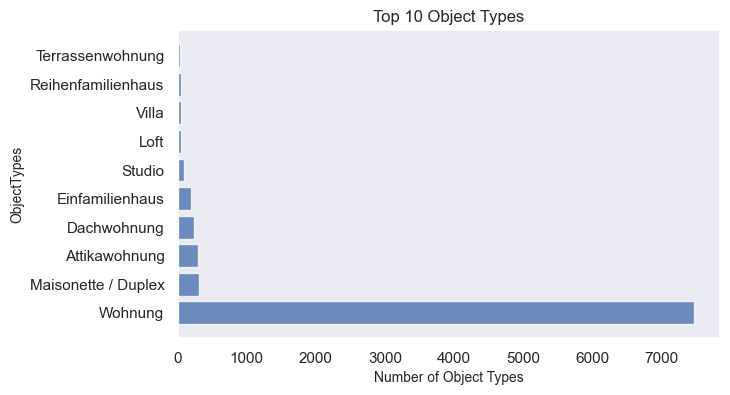

In [ ]:
# Barchart top 10 ObjectTypes
#Group data by ObjectType (only the topmost 10 values are shown)
df_bar_property = df_filtered_property_location_clean['ObjectType'].value_counts().nlargest(10).sort_values(ascending=False)

# Values for barchart
napart = list(df_bar_property.values)
index = list(df_bar_property.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='b', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of Object Types', fontsize=10)
ax.set_ylabel('ObjectTypes', fontsize=10)

# Show graph
plt.title('Top 10 Object Types')
plt.show()

<h3>Top 10 Vendors<h3/>

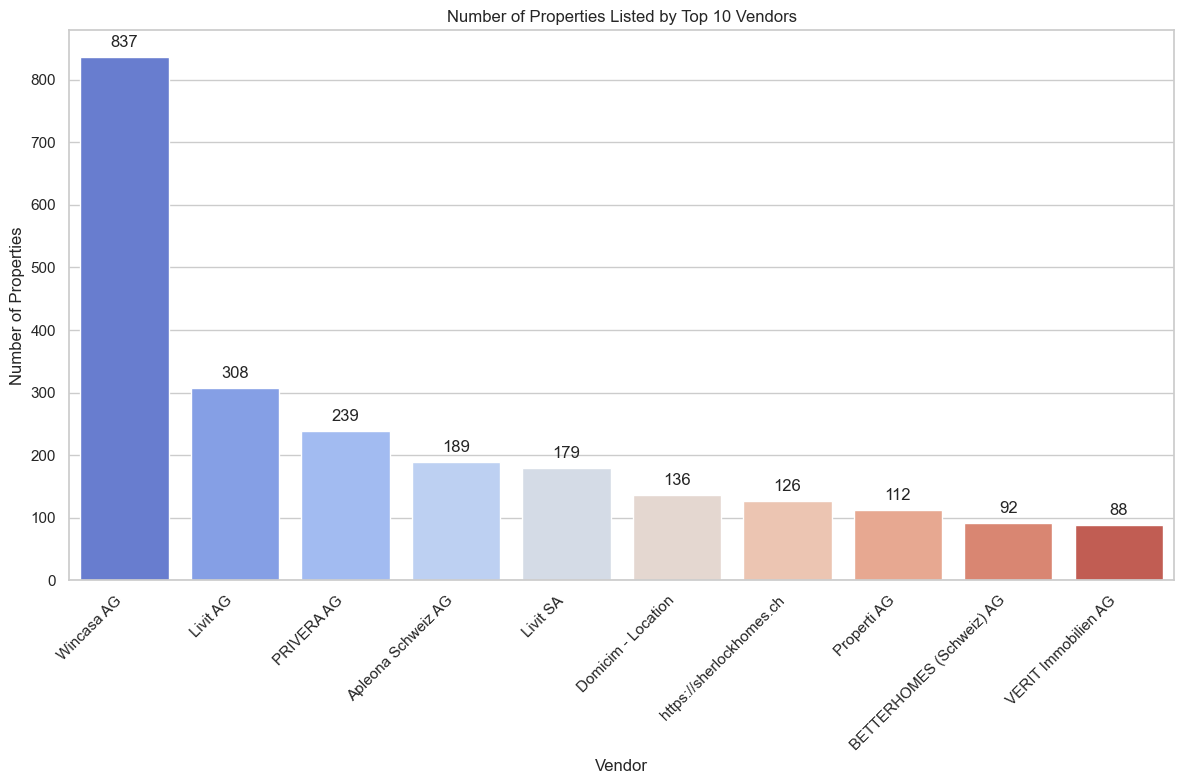

In [ ]:
#Count of properties listed by each vendor-only top 10 vendors

# Calculate counts for each vendor
vendor_counts = df_filtered_property_location_clean['Vendor'].value_counts()

# Get the top 10 vendors
top_vendors = vendor_counts.nlargest(10).index

# Filter the DataFrame to include only rows with the top 10 vendors
top_vendors_data = df_filtered_property_location_clean[df_filtered_property_location_clean['Vendor'].isin(top_vendors)]

# Apply Seaborn style
sns.set(style="whitegrid")

# Create a count plot for the 'Vendor' column with only the top 10 vendors
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Vendor', data=top_vendors_data, palette='coolwarm', order=top_vendors)

# Rotate the x labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add a title and labels
plt.title('Number of Properties Listed by Top 10 Vendors')
plt.xlabel('Vendor')
plt.ylabel('Number of Properties')

# Optional: Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()

<h3>Extreme values<h3/>

In [ ]:
# Low costs apartments - Price per m2 <=10
df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] <= 10].head(10)

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
45,4000955381,2024-03-27 21:33:52,2.5,150.0,2,Sofort,Dachwohnung,NaN,1500.0,150.0,...,Oberkulm,112.0,119.0,112.0,119.0,290.0,2,1,1,10.000000
90,3003326399,2024-03-26 22:06:05,3.5,108.0,7,Sofort,Attikawohnung,NaN,1080.0,NaN,...,Chiasso,97.0,88.0,97.0,88.0,1450.0,12,2,13,10.000000
144,4000537828,2024-03-26 22:40:17,7.5,130.0,NaN,Sofort,Wohnung,NaN,1100.0,NaN,...,Prato (Leventina),97.0,90.0,97.0,90.0,24.0,0,0,0,8.461538
173,4000864808,2024-03-26 23:03:44,3.5,80.0,NaN,Nach Vereinbarung,Wohnung,NaN,750.0,NaN,...,Giornico,97.0,95.0,97.0,95.0,43.0,0,0,0,9.375000
221,4000920616,2024-03-28 21:13:45,3.5,140.0,1,Nach Vereinbarung,Wohnung,NaN,1390.0,NaN,...,Blumenstein,302.5,175.0,302.5,175.0,80.0,0,0,0,9.928571
462,4000861865,2024-03-29 17:15:38,4.5,258.0,EG,01.06.2024,Wohnung,1985-01-01,1952.0,100.0,...,Martigny,100.0,110.0,100.0,110.0,620.0,6,2,36,7.565891
701,4000903763,2024-03-27 15:53:07,5.5,240.0,1,01.07.2024,Maisonette / Duplex,NaN,1950.0,200.0,...,Delémont,285.0,190.0,285.0,190.0,572.0,21,6,18,8.125000
817,4000935766,2024-03-27 21:19:28,2.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,1470.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,4.900000
861,4000935765,2024-03-27 21:19:40,4.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,1470.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,4.900000
862,4000935764,2024-03-27 21:19:52,1.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,820.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,2.733333


In [ ]:
# Very expensive apartments
df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] >= 100].head(10)

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
1354,4000857273,2024-03-27 13:52:45,7.5,230.0,NaN,Nach Vereinbarung,Einfamilienhaus,NaN,25000.0,NaN,...,Horw,160.0,145.00,160.0,145.00,1108.0,2,0,0,108.695652
1356,4000465081,2024-03-29 22:19:24,1.0,25.0,5,Sofort,Wohnung,NaN,2700.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,10,9,79,108.000000
3878,4000920597,2024-03-24 01:42:30,3.0,36.0,4,Sofort,Dachwohnung,2023-01-01,4120.0,NaN,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,3,27,114.444444
4142,3003168603,2024-03-24 02:44:06,2.0,32.0,NaN,Nach Vereinbarung,Wohnung,NaN,3519.0,129.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,10,1,35,109.968750
4260,3003169151,2024-03-24 03:15:30,2.0,46.0,NaN,Nach Vereinbarung,Wohnung,NaN,5076.0,186.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,110.347826
4261,3003169310,2024-03-24 03:14:31,2.0,37.0,NaN,Nach Vereinbarung,Wohnung,NaN,4142.0,152.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,9,5,126,111.945946
4266,3003168595,2024-03-24 03:17:41,1.0,36.0,NaN,Nach Vereinbarung,Wohnung,NaN,4246.0,156.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,117.944444
7725,4000969668,2024-03-29 13:26:53,2.0,9.0,1,01.08.2024,Einzelzimmer,NaN,900.0,100.0,...,Renens (VD),155.0,77.00,155.0,77.00,7080.0,4,2,9,100.000000
8219,4000842714,2024-03-29 18:58:03,1.5,13.0,2,Sofort,Wohnung,2018-01-01,1530.0,NaN,...,Sion,100.0,110.00,100.0,110.00,995.0,4,0,3,117.692308
8734,4000665076,2024-03-29 22:18:16,1.0,15.0,1,Nach Vereinbarung,Wohnung,NaN,3420.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,12,7,85,228.000000


<h3>Multivariate non-graphical exploratory data analysis (EDA)<h3/>

In [ ]:
#Cross-tabulation
pd.crosstab(df_filtered_property_location_clean['SquareMeter'], df_filtered_property_location_clean['Price'])

Price,140.0,200.0,250.0,260.0,290.0,300.0,399.0,400.0,425.0,450.0,...,13000.0,13250.0,13600.0,14000.0,14500.0,15000.0,16000.0,18000.0,20000.0,25000.0
SquareMeter,,,,,,,,,,,,,,,,,,,,,
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


<h3>Crosstabs<h3/>

In [ ]:
df = df_filtered_property_location_clean

# Create a pivot table with 'Anzahl der Zimmer' as index and 'Price' as columns
pivot_table_df = df.pivot_table(index='Rooms', columns=pd.cut(df['Price'], bins=8), values='Price', aggfunc='count', fill_value=0)

# Apply styles to the pivot table
styled_pivot_table = pivot_table_df.style.background_gradient(axis=None).bar(axis=None)

# Display the styled pivot table
styled_pivot_table

Price,"(115.14, 3247.5]","(3247.5, 6355.0]","(6355.0, 9462.5]","(9462.5, 12570.0]","(12570.0, 15677.5]","(15677.5, 18785.0]","(18785.0, 21892.5]","(21892.5, 25000.0]"
Rooms,,,,,,,,
1.000000,332,6,0,0,0,0,0,0
1.500000,270,0,0,0,0,0,0,0
2.000000,411,19,1,0,0,0,0,0
2.500000,1220,34,0,0,0,0,0,0
3.000000,729,18,2,0,0,0,0,0
3.500000,2368,106,6,0,0,0,0,0
4.000000,433,51,1,0,0,0,0,0
4.500000,1760,171,19,4,0,0,0,0
5.000000,89,49,4,0,0,0,0,0


In [ ]:
#More details on prices between CHF 136.895 - 3245.-

df = df_filtered_property_location_clean

# Filter the data to only include entries with prices in the range (136.895, 3247.5]
price_range_filtered = df[(df['Price'] > 136.895) & (df['Price'] <= 3247.5)]

# Create a pivot table with 'Anzahl der Zimmer' as index and price categories as columns
price_bins = pd.cut(price_range_filtered['Price'], bins=8)
pivot_table_df = price_range_filtered.pivot_table(index='Rooms', columns=price_bins, values='Price', aggfunc='count', fill_value=0)

# Apply styles to the pivot table
styled_pivot_table = pivot_table_df.style.background_gradient(axis=None).bar(axis=None)

# Display the styled pivot table
styled_pivot_table

Price,"(136.895, 528.125]","(528.125, 916.25]","(916.25, 1304.375]","(1304.375, 1692.5]","(1692.5, 2080.625]","(2080.625, 2468.75]","(2468.75, 2856.875]","(2856.875, 3245.0]"
Rooms,,,,,,,,
1.000000,18,127,107,45,18,8,5,4
1.500000,1,81,102,44,29,8,3,2
2.000000,1,37,160,117,54,23,11,8
2.500000,0,38,266,513,242,87,52,22
3.000000,0,19,159,295,155,55,21,25
3.500000,0,11,201,692,844,357,175,88
4.000000,1,1,41,166,107,51,43,23
4.500000,1,2,60,315,616,413,237,116
5.000000,0,1,2,16,21,27,10,12


In [ ]:
#More details on prices CHF 1304 - 2856.-

df = df_filtered_property_location_clean

# Filter the data to only include entries with prices in the range (1304.00, 2856.00]
price_range_filtered = df[(df['Price'] > 1304.00) & (df['Price'] <= 2856.00)]

# Create a pivot table with 'Anzahl der Zimmer' as index and price categories as columns
price_bins = pd.cut(price_range_filtered['Price'], bins=8)
pivot_table_df = price_range_filtered.pivot_table(index='Rooms', columns=price_bins, values='Price', aggfunc='count', fill_value=0)

# Apply styles to the pivot table
styled_pivot_table = pivot_table_df.style.background_gradient(axis=None).bar(axis=None)

# Display the styled pivot table
styled_pivot_table

Price,"(1307.453, 1502.375]","(1502.375, 1695.75]","(1695.75, 1889.125]","(1889.125, 2082.5]","(2082.5, 2275.875]","(2275.875, 2469.25]","(2469.25, 2662.625]","(2662.625, 2856.0]"
Rooms,,,,,,,,
1.000000,24,21,10,8,5,3,0,5
1.500000,26,18,16,13,7,1,2,1
2.000000,80,38,32,22,11,11,6,5
2.500000,286,232,157,81,56,30,30,22
3.000000,149,147,92,62,34,21,8,13
3.500000,317,384,479,356,219,138,110,65
4.000000,85,81,53,54,34,17,24,19
4.500000,122,197,300,312,222,192,134,102
5.000000,6,10,8,13,17,10,6,4


In [ ]:
#Heatmap erstellen mit longitude, latitude, Price - Price ist das Gewicht für jeden Punkt - Orte mit höheren Preisen sind intensiver gefärbt 
#Bereiche mit hoher Konzentration an teuren Immobilien sind intensiver gefärbt 
#(Skalierung Preis: Wenn die Preisunterschiede gross sind, könnten einige Bereiche übermässig hervorgehoben werden, während andere unterrepräsentiert bleiben (Normalisierung oder Standardisierung des Preises allenfalls sinnvoll)
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), df_filtered_property_location_clean['longitude'].mean()], zoom_start=12)

# Erstelle Daten für die Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Füge die Heatmap zum Map-Objekt hinzu
HeatMap(heat_data).add_to(map)

# Optional: Füge Marker mit Tooltips hinzu
for index, row in df_filtered_property_location_clean.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"<strong>Preis:</strong> {row['Price']} CHF<br><strong>Zimmer:</strong> {row['Rooms']}<br><strong>Quadratmeter:</strong> {row['SquareMeter']} m²",
        tooltip=f"Klicke für mehr Infos"
    ).add_to(map)

# Speichere oder zeige die Karte an
map.save('Heatmap.html')
#map

In [ ]:
#Heatmap erstellen mit longitude, latitude, Price - Price ist das Gewicht für jeden Punkt - Orte mit höheren Preisen sind intensiver gefärbt 
#Bereiche mit hoher Konzentration an teuren Immobilien sind intensiver gefärbt 
#(Skalierung Preis: Wenn die Preisunterschiede gross sind, könnten einige Bereiche übermässig hervorgehoben werden, während andere unterrepräsentiert bleiben (Normalisierung oder Standardisierung des Preises allenfalls sinnvoll)
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), df_filtered_property_location_clean['longitude'].mean()], zoom_start=12)

# Erstelle Daten für die Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Füge die Heatmap zum Map-Objekt hinzu
HeatMap(heat_data).add_to(map)

# Speichere oder zeige die Karte an
#map.save('Heatmap.html')
map

<h3>Crosstabs<h3/>

Prices and Proximity to Services

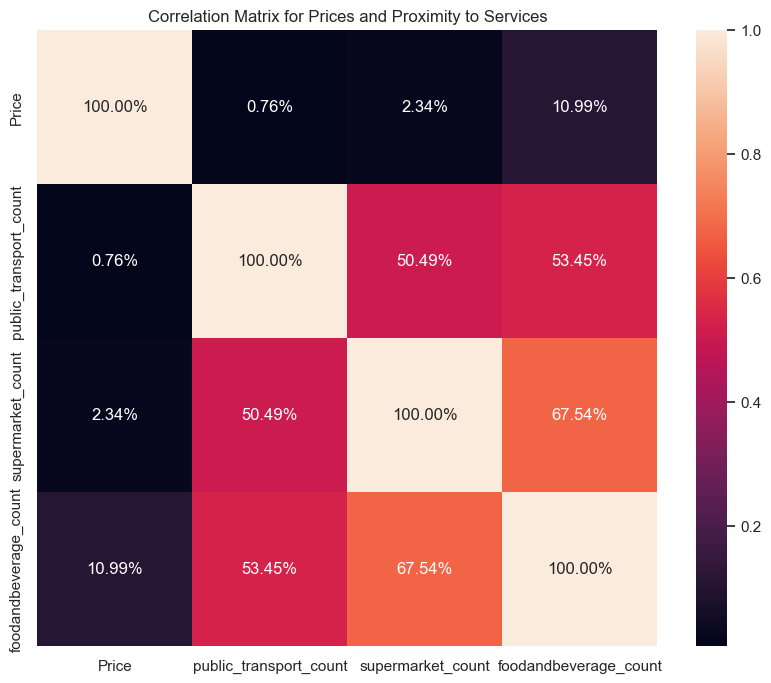

In [50]:
# Clean the dataset by dropping rows with missing values in specified columns
df_filtered_property_location_clean.dropna(subset=['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count'], inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_filtered_property_location_clean[['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, fmt=".2g", cmap='BrBG', cbar=True)
sns.heatmap(correlation_matrix, annot=True, fmt='.2%')

plt.title('Correlation Matrix for Prices and Proximity to Services')
plt.show()

Correlation Matrix for Prices, Rooms, Square Meters, Income Tax Municipality and Population Density

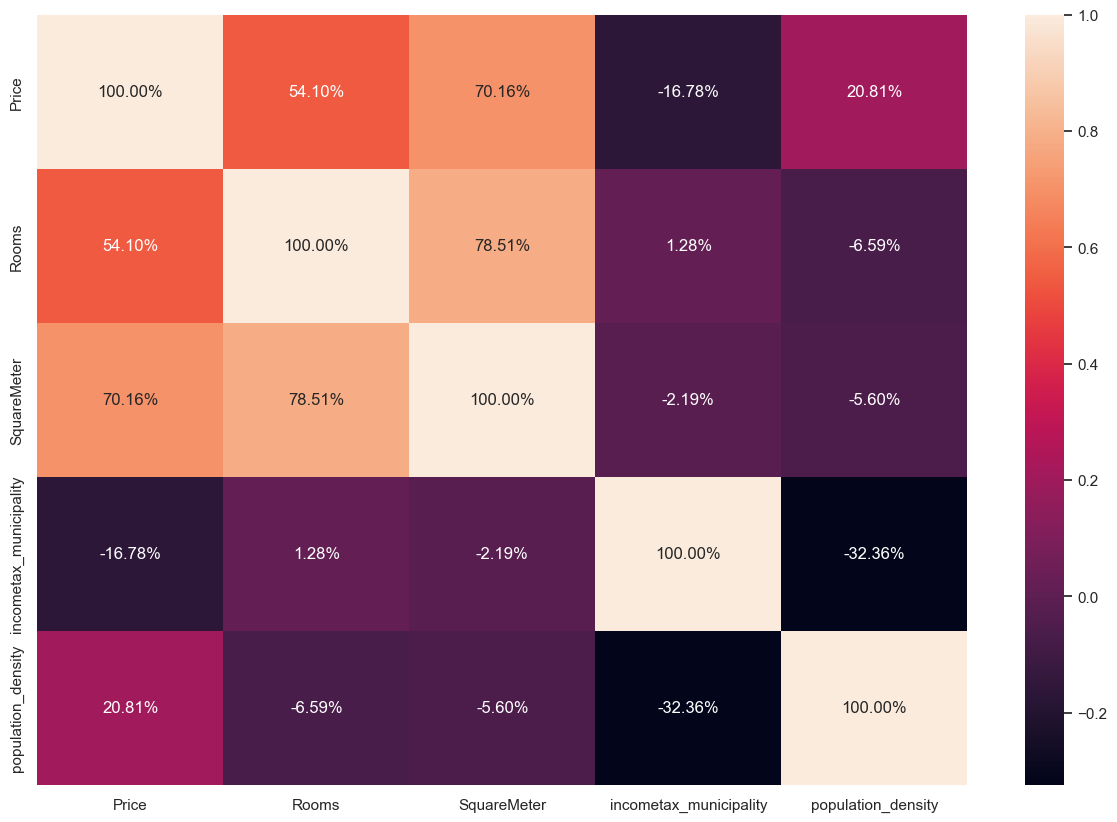

In [49]:
# property_new....
plt.figure(figsize=(15,10))
columns =['Price','Rooms','SquareMeter','incometax_municipality','population_density']
sns.heatmap(df_filtered_property_location_clean[columns].corr(),annot=True,fmt='.2%')
plt.show()

<Figure size 1000x600 with 0 Axes>

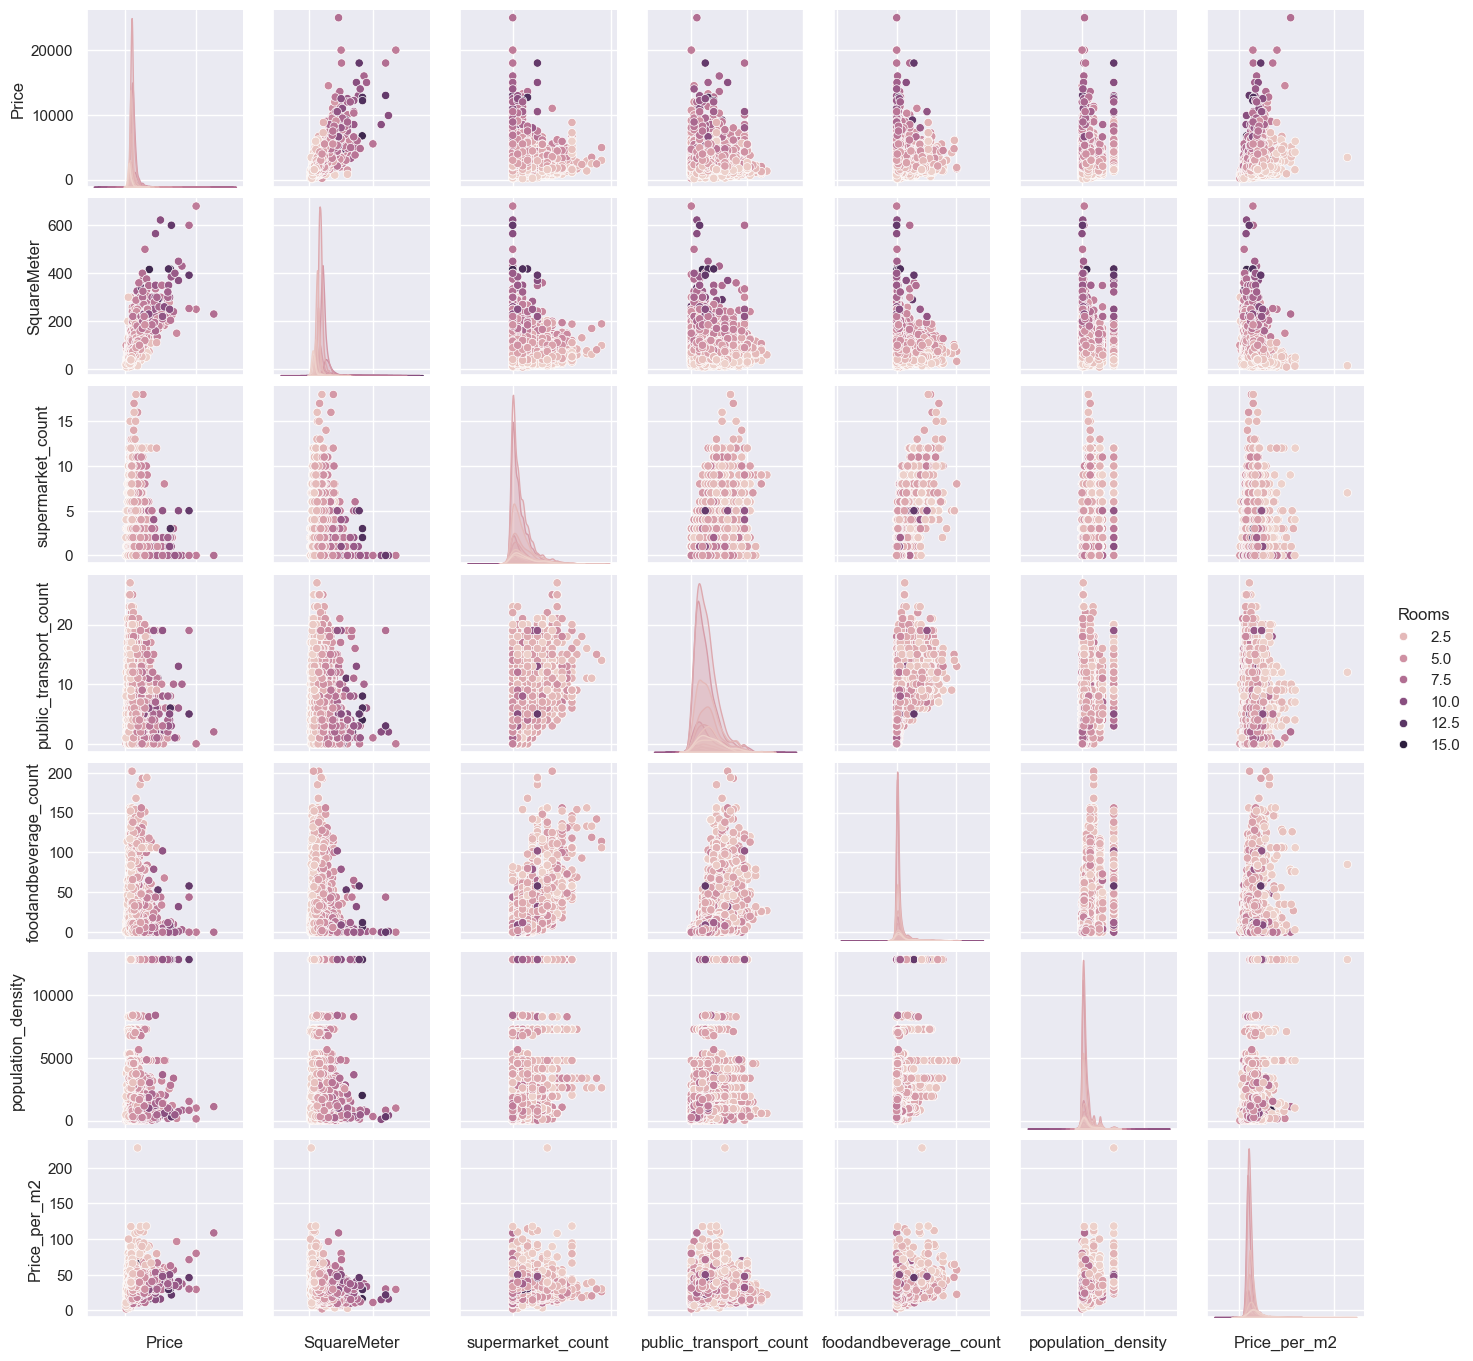

In [51]:

plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df_filtered_property_location_clean[['Price','SquareMeter','Rooms','supermarket_count','public_transport_count','foodandbeverage_count','population_density','Price_per_m2']]
                 ,hue='Rooms',size=2)
g.set(xticklabels=[])
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U10'), dtype('float64')) -> None

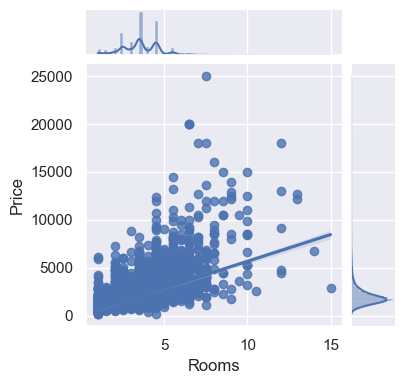

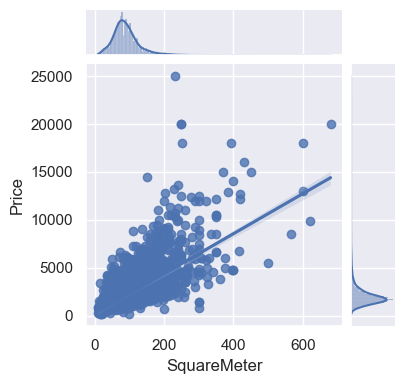

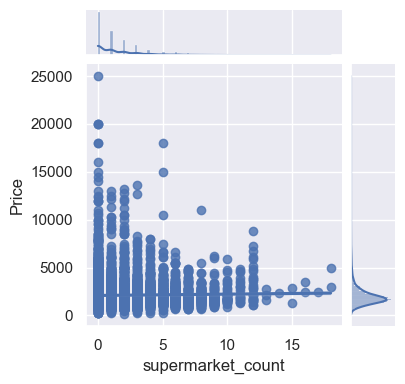

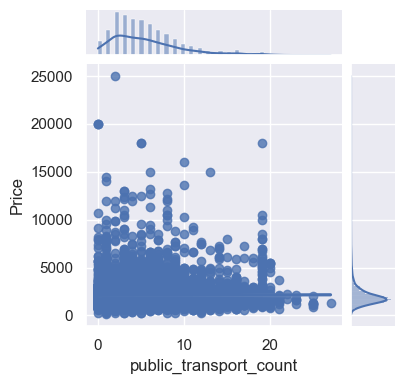

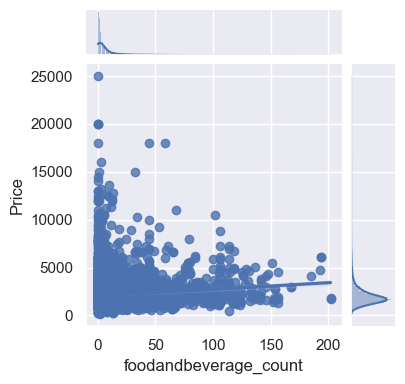

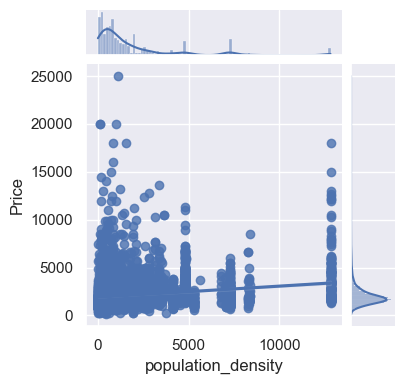

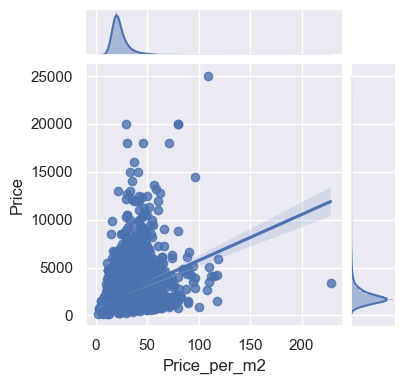

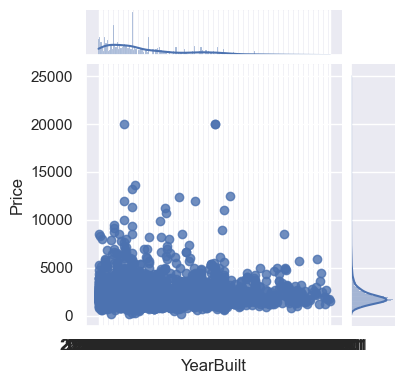

In [63]:
# Corrected code for jointplot with 'height' parameter
sns.jointplot(x='Rooms', y='Price', data=df, kind='reg', height=4)
sns.jointplot(x='SquareMeter', y='Price', data=df, kind='reg', height=4)
sns.jointplot(x='supermarket_count', y='Price', data=df, kind='reg', height=4)
sns.jointplot(x='public_transport_count', y='Price', data=df, kind='reg', height=4)
sns.jointplot(x='foodandbeverage_count', y='Price', data=df, kind='reg', height=4)
sns.jointplot(x='population_density', y='Price', data=df, kind='reg', height=4)
sns.jointplot(x='Price_per_m2', y='Price', data=df, kind='reg', height=4)
sns.jointplot(x='YearBuilt', y='Price', data=df, kind='reg', height=4)

# Show the plots
plt.show()

In [ ]:
#weitere Beispiele EDA: 
#https://github.com/aberweger/Explorative_Data_Analysis_and_Visualization/blob/master/exploratory_data_analysis_apartments_data.ipynb
#https://seaborn.pydata.org/archive/0.11/generated/seaborn.barplot.html
#https://medium.com/analytics-vidhya/apartment-market-web-scrapping-and-eda-using-python-a9eacf6d64e2
#https://www.kaggle.com/code/dgawlik/house-prices-eda
